In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 40.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 2.6 MB/s 
     |████████████████████████████████| 2.8 MB 11.4 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
df = pd.read_excel("CH10.xlsx")
df

,Date,000056.SZ,000422.SZ,000514.SZ,000532.SZ,000582.SZ,000667.SZ,000671.SZ,000732.SZ,000736.SZ,...,601857.SS,601866.SS,601872.SS,601880.SS,601899.SS,601919.SS,601939.SS,601975.SS,601988.SS,603843.SS
0,2021-01-04,3.02,3.140000,3.759137,11.852740,10.236782,3.87,5.817130,3.08,6.557623,...,4.031208,3.058320,4.647896,1.905965,9.916177,10.330769,5.926588,2.52,2.983585,3.810761
1,2021-01-05,3.02,3.150000,3.749218,11.793029,10.354221,3.84,5.835685,2.94,6.498098,...,4.021586,2.989484,4.770209,1.915789,10.084081,10.653846,5.879175,2.53,2.983585,3.780990
2,2021-01-06,2.98,3.100000,3.709544,11.584039,10.168277,3.87,5.882074,2.90,6.508019,...,4.088933,2.910813,4.647896,1.886316,10.370503,10.615384,5.936070,2.50,2.992997,3.771066
3,2021-01-07,2.91,3.090000,3.640114,11.136201,9.962758,3.82,5.798574,2.78,6.319524,...,4.088933,3.205828,4.680512,1.896140,11.042118,11.007692,5.983483,2.51,3.002409,3.632132
4,2021-01-08,2.89,3.080000,3.620277,10.748076,9.952971,3.82,5.928463,2.86,6.220317,...,4.127418,3.156659,4.810979,1.896140,11.210021,11.761538,6.011930,2.50,3.002409,3.622208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2022-03-30,8.76,21.549999,5.870000,11.770000,7.420000,2.26,3.860000,3.48,12.850000,...,5.530000,3.030000,4.660000,1.720000,11.460000,16.090000,6.190000,1.90,3.220000,5.210000
300,2022-03-31,8.50,20.320000,6.460000,11.980000,7.490000,2.15,4.250000,3.43,14.140000,...,5.520000,3.300000,4.720000,1.720000,11.340000,15.500000,6.290000,1.91,3.270000,5.730000
301,2022-04-01,8.42,21.299999,6.900000,12.260000,7.700000,2.12,3.900000,3.36,15.550000,...,5.470000,3.440000,4.940000,1.780000,11.450000,17.049999,6.300000,1.96,3.290000,5.660000
302,2022-04-06,8.21,21.730000,6.500000,12.780000,7.810000,2.14,3.590000,3.52,17.110001,...,5.610000,3.360000,4.960000,1.790000,11.600000,16.090000,6.350000,1.99,3.300000,6.230000


In [31]:
df_symbol = list(df.columns[1:])
df_symbol = df_symbol + ["000507.SZ"]  #+ ["000550.SZ","000937.SZ","000609.SZ"]

In [32]:
data = yf.download(df_symbol, start="2020-01-01", end="2022-05-06")
prices = data["Adj Close"].dropna(how="all")
prices

[*********************100%***********************]  74 of 74 completed


,000056.SZ,000422.SZ,000507.SZ,000514.SZ,000532.SZ,000582.SZ,000667.SZ,000671.SZ,000732.SZ,000736.SZ,...,601857.SS,601866.SS,601872.SS,601880.SS,601899.SS,601919.SS,601939.SS,601975.SS,601988.SS,603843.SS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.24,2.910000,6.096354,4.668977,11.989721,8.389288,2.75,7.722673,6.20,6.446579,...,5.500610,2.529246,6.353826,1.993701,4.605179,4.123076,6.622370,2.86,3.319025,4.676137
2020-01-03,4.29,2.930000,6.086554,4.728078,11.771365,8.398672,2.76,7.497654,6.13,6.411010,...,5.575576,2.500395,6.377863,1.983976,4.653655,4.046153,6.622370,2.85,3.310102,4.705796
2020-01-06,4.30,2.930000,6.047349,4.432573,11.731664,8.332984,2.76,7.281635,6.11,6.455470,...,5.837956,2.490778,6.329789,1.974250,4.711825,3.946153,6.558955,2.86,3.292258,4.735454
2020-01-07,4.36,2.960000,6.066951,4.412873,11.900393,8.379906,2.77,7.407645,6.18,6.455470,...,5.725508,2.500395,6.113454,1.993701,4.527618,3.953846,6.549896,2.84,3.319025,4.784884
2020-01-08,4.28,2.900000,5.949337,4.245420,11.523233,8.220377,2.74,7.146623,6.04,6.339876,...,5.837956,2.442694,6.017306,1.964525,4.556703,3.823076,6.468362,2.82,3.292258,4.686023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,7.33,15.880000,5.150000,4.960000,9.400000,6.987786,1.54,2.560000,2.02,19.980000,...,4.990000,2.900000,4.780000,1.640000,10.240000,13.560000,6.060000,1.79,3.280000,4.240000
2022-04-27,6.60,17.250000,5.270000,4.970000,9.850000,7.358646,1.54,2.500000,1.88,21.000000,...,5.080000,2.950000,4.960000,1.650000,10.890000,13.930000,6.000000,1.79,3.230000,4.580000
2022-04-28,5.94,17.170000,5.260000,5.470000,9.560000,7.182975,1.53,2.520000,1.83,23.100000,...,5.180000,2.970000,5.040000,1.650000,10.800000,14.060000,6.050000,1.86,3.260000,4.490000


Expected annual return: 91.1%
Annual volatility: 32.9%
Sharpe Ratio: 2.71


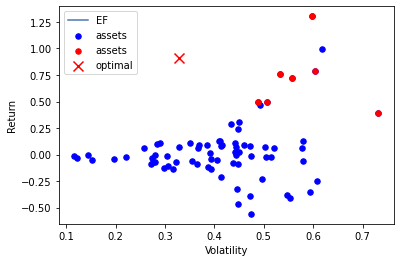

           weights
000422.SZ  0.34999
000736.SZ  0.22745
002060.SZ  0.10253
300059.SZ  0.03262
300364.SZ  0.00202
600988.SS  0.17452
601919.SS  0.11088


In [33]:
# 一般風險計算
def 效率前緣(data,plt=True):
    import numpy as np
    import pandas as pd
    from pypfopt import risk_models
    from pypfopt import expected_returns
    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import cla #package tell to plot by cla package
    import matplotlib.pyplot as plt
    mu = expected_returns.mean_historical_return(data)#
    S = risk_models.sample_cov(data)
    ef = EfficientFrontier(mu, S,weight_bounds=(0, 1))
    weight=ef.max_sharpe()
    weight=pd.DataFrame(weight.values(),index=weight.keys(),columns=['weights'])
    cov=np.sqrt(np.diag(ef.cov_matrix))#計算風險
    ret=ef.expected_returns#計算報酬
    np.random.seed(1000)
    cut=weight[weight == 0].iloc[np.random.randint(0,len(weight[weight == 0]),10)].index    
    notcut=weight[weight != 0].dropna().index
    tickers=list(cut)+list(notcut)
    
    data_tickers=data[tickers]
    mu = expected_returns.mean_historical_return(data_tickers)#
    S = risk_models.sample_cov(data_tickers)   
    c=cla.CLA(mu, S,weight_bounds=(0, 1))# grab the ef from CLA function
    try:
        EF=c.efficient_frontier(points=100)#grab the 25 points  on default=100
    except:c.efficient_frontier(points=100)
    mus, sigmas, weights = c.frontier_values
    
    
    data_notcut=data[notcut]
    mu = expected_returns.mean_historical_return(data_notcut)#
    S = risk_models.sample_cov(data_notcut)   
    c=cla.CLA(mu, S,weight_bounds=(0, 1))# grab the ef from CLA function
    weight=c.max_sharpe()#grabe the optimal weights
    EF=c.efficient_frontier(points=25)#grab the 25 points  on default=100
    #obtain the optimal ret,risk from .performance()
    #grab points values, mus sigmas, weights
    #mus, sigmas, weights = c.frontier_values
    optimal_ret, optimal_risk, _ = c.portfolio_performance(verbose=True)
    cov_c=np.sqrt(np.diag(c.cov_matrix))#計算風險
    ret_c=c.expected_returns#計算報酬
    
    #作圖
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
    fig, ax = plt.subplots()
    #plot efficient frontier
    ax.plot(sigmas,mus,label='EF')#效率曲畫線
    #plot assets
    #the diagnal of the matrix is the self variance
    ax.scatter(cov,ret,s=30,color="b",label="assets",)#畫出每個股票的點
    ax.scatter(cov_c,ret_c,s=30,color="r",label="assets",)#畫出有權重的股票的點
    
    #plot optimal point#標記出最適頭組的點
    ax.scatter(optimal_risk, optimal_ret, marker="x", s=100, color="r", label="optimal")                
    ax.legend()#legend
    #x and y axis
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()
    bestweights=c.clean_weights()
    return pd.DataFrame(bestweights.values(),index=bestweights.keys(),columns=['weights'])



if __name__ == '__main__':
    from pypfopt import risk_models
    from pypfopt import expected_returns
    from pypfopt.efficient_frontier import EfficientFrontier
    
    
    #第一部分: 做DATA
    import numpy as np
    import pandas as pd
    bestweights=效率前緣(prices)
    print(bestweights)

In [13]:
from pypfopt import objective_functions  #UK
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)

a = ef.tickers.index("NG.L")
ef.add_constraint(lambda w: w[a] >= 0.05)




ef.max_sharpe()
print(ef.portfolio_performance(verbose=True))
weights = ef.clean_weights()
weights = pd.DataFrame(weights.values(),index=weights.keys(),columns=['weights'])
weights = weights[weights.values != 0]
weights

Expected annual return: 38.2%
Annual volatility: 15.3%
Sharpe Ratio: 2.36
(0.38181464849106994, 0.15333032294219537, 2.359707079124016)


,weights
ALL.L,0.09279
BLU.L,0.00529
EML.L,0.00325
HMI.L,0.07292
KOD.L,0.03453
NG.L,0.06195
PIER.L,0.02761
PREM.L,0.01465
PXEN.L,0.00027
SHIP.L,0.60103


In [34]:
from pypfopt import objective_functions
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)

a = ef.tickers.index("000507.SZ")
ef.add_constraint(lambda w: w[a] >= 0.1)
b = ef.tickers.index("000736.SZ")
ef.add_constraint(lambda w: w[b] <= 0.1)


ef.max_sharpe()
print(ef.portfolio_performance(verbose=True))
weights = ef.clean_weights()
weights = pd.DataFrame(weights.values(),index=weights.keys(),columns=['weights'])
weights = weights[weights.values != 0]
weights

Expected annual return: 83.5%
Annual volatility: 32.2%
Sharpe Ratio: 2.53
(0.834634758670264, 0.322415009082179, 2.526665123280986)


,weights
000422.SZ,0.36664
000507.SZ,0.10000
000736.SZ,0.10000
002060.SZ,0.10493
300059.SZ,0.04112
600988.SS,0.18085
601919.SS,0.10645


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


Expected annual return: 90.6%
Annual volatility: 32.5%
Sharpe Ratio: 2.73


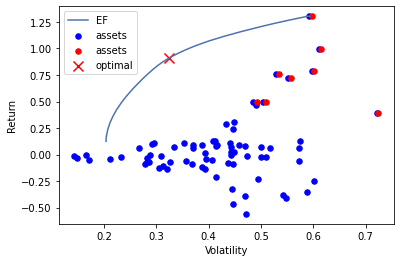

           weights
000422.SZ  0.34550
000736.SZ  0.22223
002060.SZ  0.10293
300059.SZ  0.03775
300364.SZ  0.00427
600096.SS  0.00000
600988.SS  0.17353
601919.SS  0.11380


In [35]:
def 效率前緣(data,plt=True):
    import numpy as np
    import pandas as pd
    from pypfopt import risk_models
    from pypfopt import expected_returns
    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import cla#package tell to plot by cla package
    import matplotlib.pyplot as plt
    from pypfopt import objective_functions
    mu = expected_returns.mean_historical_return(data)
    S = risk_models.CovarianceShrinkage(data).ledoit_wolf()
    ef = EfficientFrontier(mu, S,weight_bounds=(0, 1))
    ef.add_objective(objective_functions.L2_reg, gamma=0.1)
    weight=ef.max_sharpe()
    weight=pd.DataFrame(weight.values(),index=weight.keys(),columns=['weights'])
    cov=np.sqrt(np.diag(ef.cov_matrix))#計算風險
    ret=ef.expected_returns#計算報酬
    np.random.seed(1000)
    cut=weight[weight == 0].iloc[np.random.randint(0,len(weight[weight == 0]),10)].index
    notcut=weight[weight != 0].dropna().index
    tickers=list(cut)+list(notcut)

    data_tickers=data[tickers]
    mu = expected_returns.mean_historical_return(data_tickers)#
    S = risk_models.CovarianceShrinkage(data_tickers).ledoit_wolf()
    c=cla.CLA(mu, S,weight_bounds=(0, 1))# grab the ef from CLA function
    try:
        EF=c.efficient_frontier(points=100)#grab the 25 points  on default=100
    except:c.efficient_frontier(points=100)
    mus, sigmas, weights = c.frontier_values


    data_notcut=data[notcut]
    mu = expected_returns.mean_historical_return(data_notcut)#
    S = risk_models.CovarianceShrinkage(data_notcut).ledoit_wolf()
    c=cla.CLA(mu, S,weight_bounds=(0, 1))# grab the ef from CLA function
    weight=c.max_sharpe()#grabe the optimal weights
    EF=c.efficient_frontier(points=25)#grab the 25 points  on default=100
    #obtain the optimal ret,risk from .performance()
    #grab points values, mus sigmas, weights
    #mus, sigmas, weights = c.frontier_values
    optimal_ret, optimal_risk, _ = c.portfolio_performance(verbose=True)
    cov_c=np.sqrt(np.diag(c.cov_matrix))#計算風險
    ret_c=c.expected_returns#計算報酬

    #作圖
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
    fig, ax = plt.subplots()
    #plot efficient frontier
    ax.plot(sigmas,mus,label='EF')#效率曲畫線
    #plot assets
    #the diagnal of the matrix is the self variance
    ax.scatter(cov,ret,s=30,color="b",label="assets",)#畫出每個股票的點
    ax.scatter(cov_c,ret_c,s=30,color="r",label="assets",)#畫出有權重的股票的點

    #plot optimal point#標記出最適頭組的點
    ax.scatter(optimal_risk, optimal_ret, marker="x", s=100, color="r", label="optimal")
    ax.legend()#legend
    #x and y axis
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()
    bestweights=c.clean_weights()
    return pd.DataFrame(bestweights.values(),index=bestweights.keys(),columns=['weights'])



if __name__ == '__main__':
    from pypfopt import risk_models
    from pypfopt import expected_returns
    from pypfopt.efficient_frontier import EfficientFrontier


    #第一部分: 做DATA
    import numpy as np
    import pandas as pd

    #path=r'UK15.xlsx'

    #data=pd.read_excel(path,index_col=0)

    bestweights=效率前緣(prices)

    print(bestweights)

In [15]:
from pypfopt import objective_functions   #UK
mu = expected_returns.mean_historical_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S,weight_bounds=(0, 1))
ef.add_objective(objective_functions.L2_reg, gamma=0.1)

a = ef.tickers.index("NG.L")
ef.add_constraint(lambda w: w[a] >= 0.05)

ef.max_sharpe()
print(ef.portfolio_performance(verbose=True))
weights = ef.clean_weights()
weights = pd.DataFrame(weights.values(),index=weights.keys(),columns=['weights'])
weights = weights[weights.values != 0]
weights

Expected annual return: 180.7%
Annual volatility: 127.6%
Sharpe Ratio: 1.40
(1.8065296872806396, 1.2759396899871858, 1.4001678145920686)


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


,weights
ALL.L,0.09275
ANGS.L,0.01682
AV.L,0.00526
BATS.L,0.00459
BLU.L,0.04479
CHG.L,0.01617
DGE.L,0.00807
EML.L,0.03891
FUL.L,0.00604
HMI.L,0.08010


In [36]:
from pypfopt import objective_functions   #56 422 736
mu = expected_returns.mean_historical_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S,weight_bounds=(0, 1))
ef.add_objective(objective_functions.L2_reg, gamma=0.1)

a = ef.tickers.index("000507.SZ")
ef.add_constraint(lambda w: w[a] >= 0.1)
b = ef.tickers.index("000736.SZ")
ef.add_constraint(lambda w: w[b] <= 0.1)

ef.max_sharpe()
print(ef.portfolio_performance(verbose=True))
weights = ef.clean_weights()
weights = pd.DataFrame(weights.values(),index=weights.keys(),columns=['weights'])
weights = weights[weights.values != 0]
weights

Expected annual return: 81.5%
Annual volatility: 31.3%
Sharpe Ratio: 2.54
(0.8152639135532721, 0.3128184780903229, 2.542253636703802)


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


,weights
000422.SZ,0.31886
000507.SZ,0.10000
000736.SZ,0.10000
002060.SZ,0.09693
300059.SZ,0.05035
300364.SZ,0.00862
600096.SS,0.04310
600657.SS,0.00117
600988.SS,0.16554
601919.SS,0.11543


In [37]:
weights.to_csv("128.csv")

In [38]:
prices_2 = prices[list(weights.index)]

In [40]:
market_prices = yf.download("000001.SS", start="2020-01-01", end="2022-05-06")["Adj Close"]
market_prices

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02    3085.197998
2020-01-03    3083.785889
2020-01-06    3083.407959
2020-01-07    3104.802002
2020-01-08    3066.893066
                 ...     
2022-04-26    2886.429932
2022-04-27    2958.280029
2022-04-28    2975.479980
2022-04-29    3047.060059
2022-05-05    3067.760010
Name: Adj Close, Length: 564, dtype: float64

In [18]:
market_prices = yf.download("ISF.L", start="2020-01-01", end="2022-05-06")["Adj Close"]
market_prices

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02    749.400024
2020-01-03    752.000000
2020-01-06    746.799988
2020-01-07    746.700012
2020-01-08    746.500000
                 ...    
2022-04-28    740.599976
2022-04-29    744.700012
2022-05-03    745.700012
2022-05-04    739.900024
2022-05-05    741.500000
Name: Adj Close, Length: 592, dtype: float64

In [41]:
tickers = list(weights.index)
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'000422.SZ': 17598193664,
 '000507.SZ': 5729948672,
 '000736.SZ': 13254971392,
 '002060.SZ': 9545944064,
 '300059.SZ': 298376626176,
 '300364.SZ': 6923369472,
 '600096.SS': 48081960960,
 '600657.SS': 18451662848,
 '600988.SS': 26023553024,
 '601919.SS': 216418402304}

In [20]:
del mcaps['TYT.L']
mcaps

{'ALL.L': 300610464,
 'ANGS.L': 14781421,
 'AV.L': 12184662016,
 'BATS.L': 81250852864,
 'BLU.L': 15727226,
 'CHG.L': 986854464,
 'DGE.L': 83312328704,
 'EML.L': 86930984,
 'FUL.L': 84013080,
 'HMI.L': 29226608,
 'IMB.L': 16945434624,
 'KOD.L': 43222180,
 'KP2.L': 40505880,
 'MGGT.L': 6044898304,
 'NG.L': 43784994816,
 'OSB.L': 2292489216,
 'PIER.L': 28896884,
 'PREM.L': 60195800,
 'PXEN.L': 7553108,
 'SHIP.L': 407390272,
 'VVO.L': 1806656640}

In [21]:
prices_3 = prices_2.drop("TYT.L", axis = 1)
prices_3

,ALL.L,ANGS.L,AV.L,BATS.L,BLU.L,CHG.L,DGE.L,EML.L,FUL.L,HMI.L,...,KOD.L,KP2.L,MGGT.L,NG.L,OSB.L,PIER.L,PREM.L,PXEN.L,SHIP.L,VVO.L
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,10.750000,0.850,368.074341,2752.842773,0.120,237.030945,3010.368896,3.90,12.250,3.625,...,0.043,1.150,621.597656,857.384033,392.916077,52.5,0.083,0.125,0.874182,113.918152
2020-01-03,11.375000,0.850,364.424927,2826.195557,0.115,238.467484,3016.516602,3.90,12.250,3.625,...,0.043,1.150,626.536987,857.744812,389.728912,53.0,0.085,0.120,0.874182,110.637314
2020-01-06,11.750000,0.825,359.732697,2824.509277,0.115,235.594391,3010.842285,3.75,12.250,3.625,...,0.043,1.150,628.626709,853.685181,378.396484,53.0,0.090,0.120,0.874182,107.903275
2020-01-07,11.250000,0.850,362.687042,2871.724854,0.125,234.636688,3011.787842,3.75,12.150,3.625,...,0.043,1.150,626.347046,850.347351,374.500977,53.0,0.085,0.140,0.874182,106.080589
2020-01-08,11.250000,0.880,361.557404,2925.264160,0.135,233.678986,3034.486572,3.70,11.900,3.625,...,0.043,1.150,639.455322,847.911621,375.386292,53.0,0.083,0.140,0.869979,107.538742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,55.000000,1.350,459.948700,3330.000000,0.355,335.000000,3989.500000,8.50,16.000,14.850,...,0.320,1.375,773.000000,1225.500000,560.000000,101.5,0.303,4.350,1.345500,145.199997
2022-04-29,56.000000,1.350,462.188629,3352.000000,0.338,351.500000,4018.500000,9.40,16.000,14.950,...,0.330,1.375,775.000000,1194.000000,561.500000,101.5,0.288,4.400,1.355357,144.800003
2022-05-03,55.000000,1.325,469.335388,3346.000000,0.318,359.500000,3996.000000,9.90,16.000,16.100,...,0.338,1.300,773.200012,1194.500000,558.500000,93.5,0.310,4.620,1.370143,144.600006


In [42]:
from pypfopt import black_litterman, risk_models,BlackLittermanModel
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(prices_2).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)

In [43]:
market_prior

000422.SZ    0.008367
000507.SZ    0.012799
000736.SZ    0.011874
002060.SZ    0.013021
300059.SZ   -0.004665
300364.SZ    0.006821
600096.SS    0.003273
600657.SS    0.012909
600988.SS    0.011927
601919.SS   -0.006845
dtype: float64

In [44]:
viewdict = {
    "000422.SZ": 0.05, #0.8
    "000507.SZ": 0.2,  #0.8
    #"000550.SZ": 0.02,  #0.6
    #"000609.SZ": 0.02,  #0.5
    "000736.SZ": 0,   #0.9
    "002060.SZ": 0.12, #0.8
    #"000937.SZ": 0.02,   #0.8
    "300059.SZ": 0.04,  #0.8
    "300364.SZ": 0.01,  #0.7
    "600096.SS": 0.04,  #0.7
    "600657.SS": 0, #0.9
    "600988.SS": 0,   #0.9
    "601919.SS": 0.05 #0.7
}

In [25]:
viewdict = {
    "ALL.L": 0, #0.9
    "ANGS.L": 0.02, #0.7
    "AV.L": 0,  #0.9
    "BATS.L": 0.06, #0.8
    "BLU.L": 0,  #0.9
    "CHG.L": 0.12, #0.8
    #"COA.L": 0.03, #0.6
    "DGE.L": 0,  #0.9
    "EML.L": 0.05,  #0.8
    "FUL.L": 0,  #0.9
    "HMI.L": 0.02, #0.6
    #"HSBA.L": 0.01, #0.6
    "IMB.L": 0.03, #0.6
    "KOD.L": 0,  #0.9
    "KP2.L": 0,  #0.9
    #"LGEN.L": 0,  #0.9
    "MGGT.L": 0.01, #0.8
    "NG.L": 0.04,  #0.8
    #"MNG.L": 0.02, #0.6
    #"NWG.L": 0, #0.9
    "OSB.L": 0, #0.9
    "PIER.L": 0, #0.9
    "PREM.L": 0.01, #0.8
    "PXEN.L": 0.15, #0.8
    "SHIP.L": 0.02, #0.7
    #"TYT.L": 0, #0.9
    #"ULE.L": 0,  #0.9
    "VVO.L": 0.025 #0.7
}

In [ ]:
Q = np.array([-0.20, 0.05, 0.10, 0.15]).reshape(-1, 1)
P = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0.5, 0.5, -0.5, -0.5, 0, 0],
    ]
)

In [45]:
confidences = [
    0.8,
    0.8,
    0.9,
    0.8,
    0.8,
    0.7,
    0.7,
    0.9,
    0.9,
    0.7
]
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)
ret_bl = bl.bl_returns()
ret_bl

000422.SZ    0.047337
000507.SZ    0.160802
000736.SZ    0.004259
002060.SZ    0.105540
300059.SZ    0.038057
300364.SZ    0.021591
600096.SS    0.044991
600657.SS    0.005217
600988.SS    0.004019
601919.SS    0.053999
dtype: float64

In [26]:
confidences = [
    0.9,
    0.7,
    0.9,
    0.8,
    0.9, 
    0.8,
    0.9,
    0.8,
    0.9,
    0.6,
    0.6,
    0.9,
    0.9,
    0.8,
    0.8,
    0.9,
    0.9,
    0.8,
    0.8,
    0.7,
    0.7
]
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)
ret_bl = bl.bl_returns()
ret_bl

ALL.L     0.001993
ANGS.L    0.019999
AV.L      0.001726
BATS.L    0.048342
BLU.L     0.002000
CHG.L     0.099956
DGE.L     0.000124
EML.L     0.043996
FUL.L     0.001998
HMI.L     0.019997
IMB.L     0.024474
KOD.L     0.001999
KP2.L     0.001999
MGGT.L    0.011728
NG.L      0.034029
OSB.L     0.001948
PIER.L    0.001999
PREM.L    0.011997
PXEN.L    0.124000
SHIP.L    0.019972
VVO.L     0.023378
dtype: float64

In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12)
]
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

#print(variances)
omega = np.diag(variances)
#print(omega)
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)
ret_bl = bl.bl_returns()
ret_bl

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986]
[[0.015625 0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.0225   0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.015625 0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.005625 0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.0025   0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.0025   0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.0025   0.      ]
 [0.       0.       0.       0.       0.       0.       0.       0.0004  ]]


In [46]:
from pypfopt import objective_functions
S_bl = bl.bl_cov()
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg, gamma=1)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


OrderedDict([('000422.SZ', 0.05603),
             ('000507.SZ', 0.53409),
             ('000736.SZ', 0.0),
             ('002060.SZ', 0.27698),
             ('300059.SZ', 0.02692),
             ('300364.SZ', 0.0),
             ('600096.SS', 0.03625),
             ('600657.SS', 0.0),
             ('600988.SS', 0.0),
             ('601919.SS', 0.06973)])

In [47]:
a = pd.Series(weights)
a = a[a.values != 0]
a

000422.SZ    0.05603
000507.SZ    0.53409
002060.SZ    0.27698
300059.SZ    0.02692
600096.SS    0.03625
601919.SS    0.06973
dtype: float64

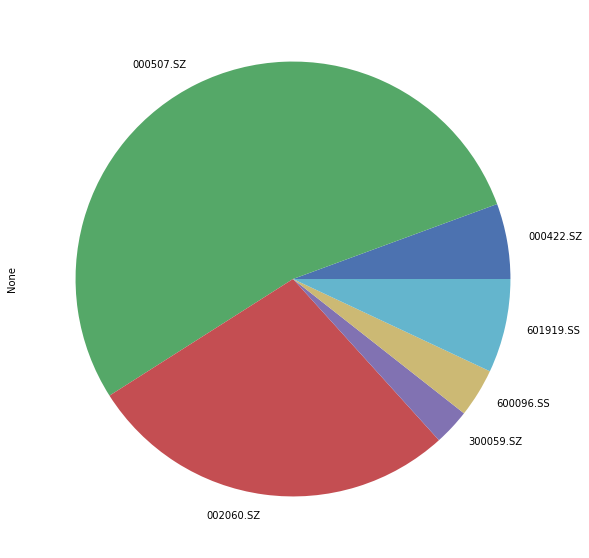

In [48]:
a.plot.pie(figsize=(10,10));

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 16.4%
Annual volatility: 47.3%
Sharpe Ratio: 0.31


(0.16426130878072384, 0.47269265522078036, 0.30519050208923554)

In [ ]:
Q = np.array([-0.20, 0.05, 0.10, 0.15]).reshape(-1, 1)

P = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0.5, 0.5, -0.5, -0.5, 0, 0],
    ]
)